### PDF to JPG

In [25]:
pip install pdf2image easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
!apt-get install poppler-utils

# Solving Error 'PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?'
# colab 환경(리눅스) 명령어로 수행함

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [27]:
from pdf2image import convert_from_path

file_name = "sample_doc.pdf" # pdf 파일 이름

pages = convert_from_path("./" + file_name) # 파일 경로

for i, page in enumerate(pages):
	page.save("./source/"+file_name+str(i)+".jpg", "JPEG")


### EasyOCR

In [28]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import easyocr

In [29]:
# custom_easyocr = easyocr.CharSpacing(10)
reader = easyocr.Reader(['ko','en'], gpu=True)
result = reader.readtext("./source/sample_doc.pdf0.jpg", width_ths=0.1, adjust_contrast=0.1)

In [30]:
for i in result[:100]:
    print(i)


([[571, 295], [677, 295], [677, 333], [571, 333]], '"김해름', 0.8710522346765323)
([[681, 293], [807, 293], [807, 333], [681, 333]], '아름답게', 0.9942207932472229)
([[811, 293], [905, 293], [905, 333], [811, 333]], '시민올', 0.4488222821542961)
([[909, 291], [1045, 291], [1045, 333], [909, 333]], '행복하게"', 0.9993688155380802)
([[572, 332], [620, 332], [620, 382], [572, 382]], '김', 0.9999648335687574)
([[794, 332], [844, 332], [844, 382], [794, 382]], '해', 0.9999916553671397)
([[222, 394], [252, 394], [252, 426], [222, 426]], '우', 0.9999914169495696)
([[261, 393], [409, 393], [409, 429], [261, 429]], '621-010/', 0.9422910627215582)
([[427, 389], [499, 389], [499, 429], [427, 429]], '경남', 0.9859620190493195)
([[499, 389], [599, 389], [599, 429], [499, 429]], '김해시', 0.9977198839350826)
([[602, 389], [704, 389], [704, 429], [602, 429]], '부원동', 0.9317537574544223)
([[708, 394], [770, 394], [770, 426], [708, 426]], '623', 0.9999995870469189)
([[775, 389], [859, 389], [859, 429], [775, 429]], '번지/', 0.

In [31]:
for i in result[:30]:
    print(i)


([[571, 295], [677, 295], [677, 333], [571, 333]], '"김해름', 0.8710522346765323)
([[681, 293], [807, 293], [807, 333], [681, 333]], '아름답게', 0.9942207932472229)
([[811, 293], [905, 293], [905, 333], [811, 333]], '시민올', 0.4488222821542961)
([[909, 291], [1045, 291], [1045, 333], [909, 333]], '행복하게"', 0.9993688155380802)
([[572, 332], [620, 332], [620, 382], [572, 382]], '김', 0.9999648335687574)
([[794, 332], [844, 332], [844, 382], [794, 382]], '해', 0.9999916553671397)
([[222, 394], [252, 394], [252, 426], [222, 426]], '우', 0.9999914169495696)
([[261, 393], [409, 393], [409, 429], [261, 429]], '621-010/', 0.9422910627215582)
([[427, 389], [499, 389], [499, 429], [427, 429]], '경남', 0.9859620190493195)
([[499, 389], [599, 389], [599, 429], [499, 429]], '김해시', 0.9977198839350826)
([[602, 389], [704, 389], [704, 429], [602, 429]], '부원동', 0.9317537574544223)
([[708, 394], [770, 394], [770, 426], [708, 426]], '623', 0.9999995870469189)
([[775, 389], [859, 389], [859, 429], [775, 429]], '번지/', 0.

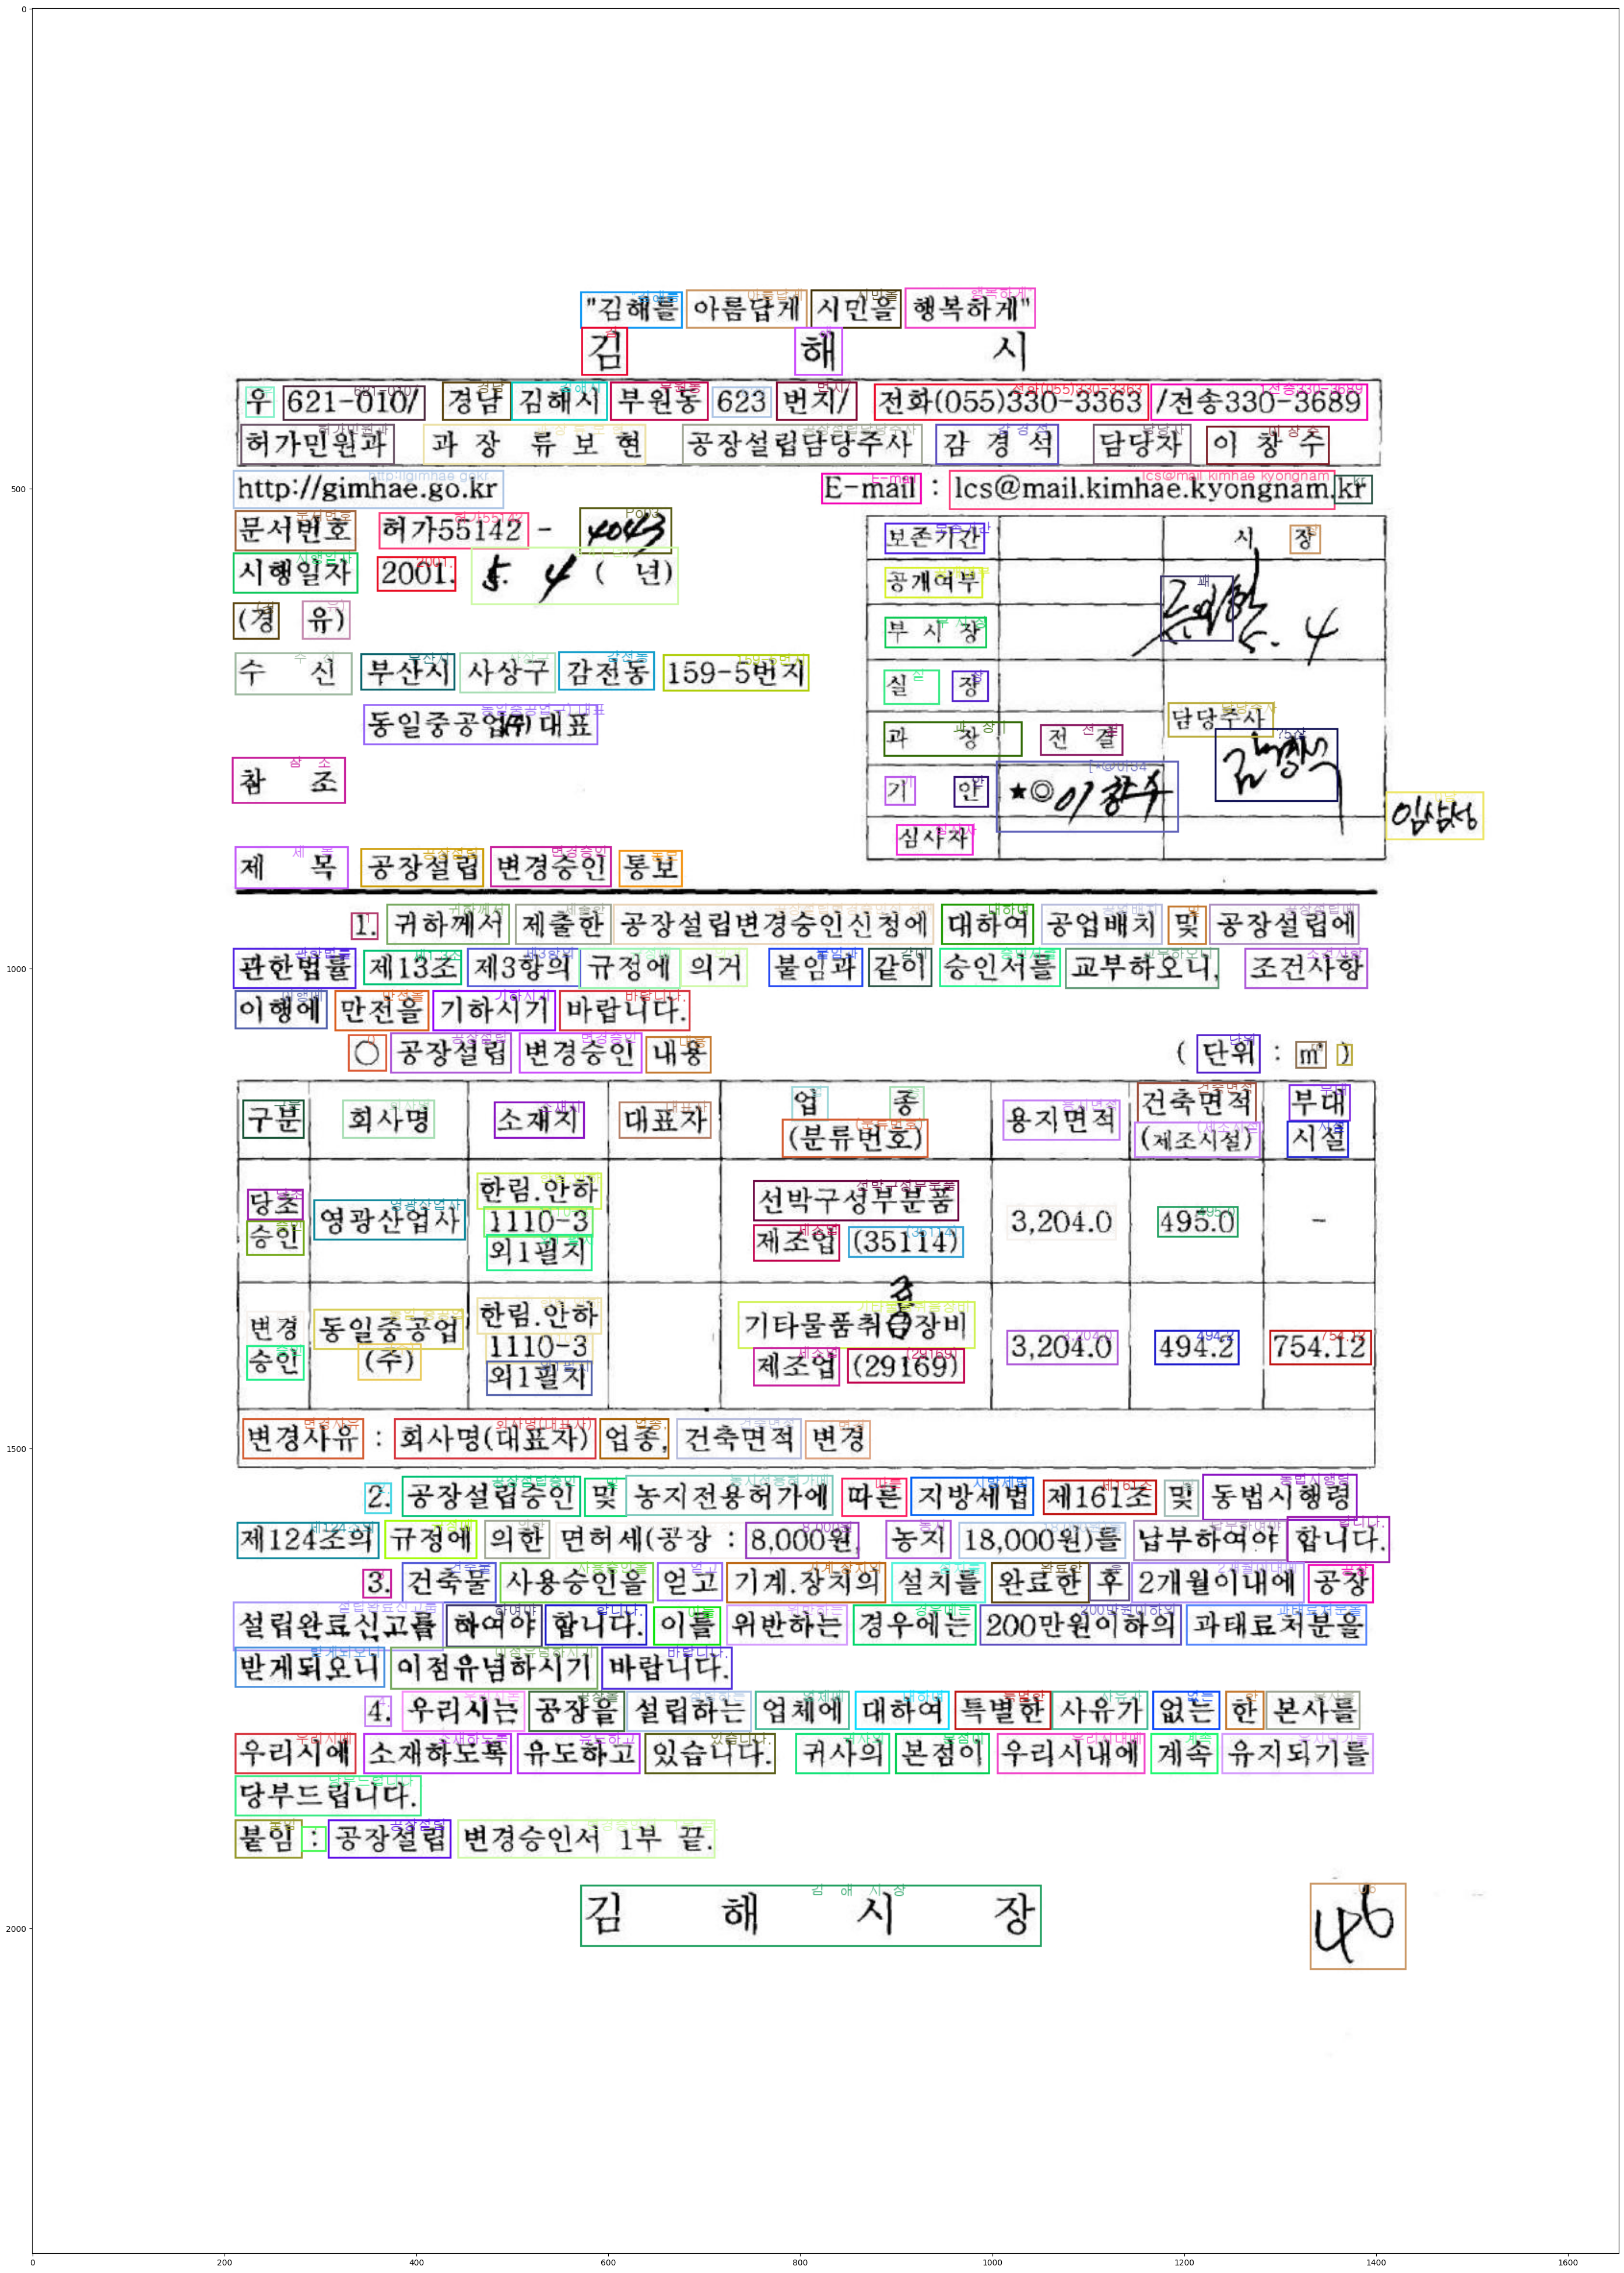

In [32]:
img = cv2.imread('./source/sample_doc.pdf0.jpg')

img = Image.fromarray(img)    # 이미지에 그리기 위해서 CV2 이미지를 PIL 이미지 객체로 변환
font = ImageFont.truetype('./asset/gulim.ttf',15)
draw = ImageDraw.Draw(img)

np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")

for i in result :
    # 이미지 좌표 변수 지정
    x = i[0][0][0] 
    y = i[0][0][1] 
    w = i[0][1][0] - i[0][0][0] 
    h = i[0][2][1] - i[0][1][1]
    
    # 랜덤 색상 지정
    color_idx = random.randint(0,255)
    color = [int(c) for c in COLORS[color_idx]]

    # 이미지에 인식 영역 / 인식 문자 출력
    draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)
    draw.text((int((x + x + w) / 2) , y-2),str(i[1]), font=font, fill=tuple(color),)


plt.figure(figsize=(50,50))
plt.imshow(img)
plt.show()
# plt.savefig('./result/sample_img0_7.jpg')

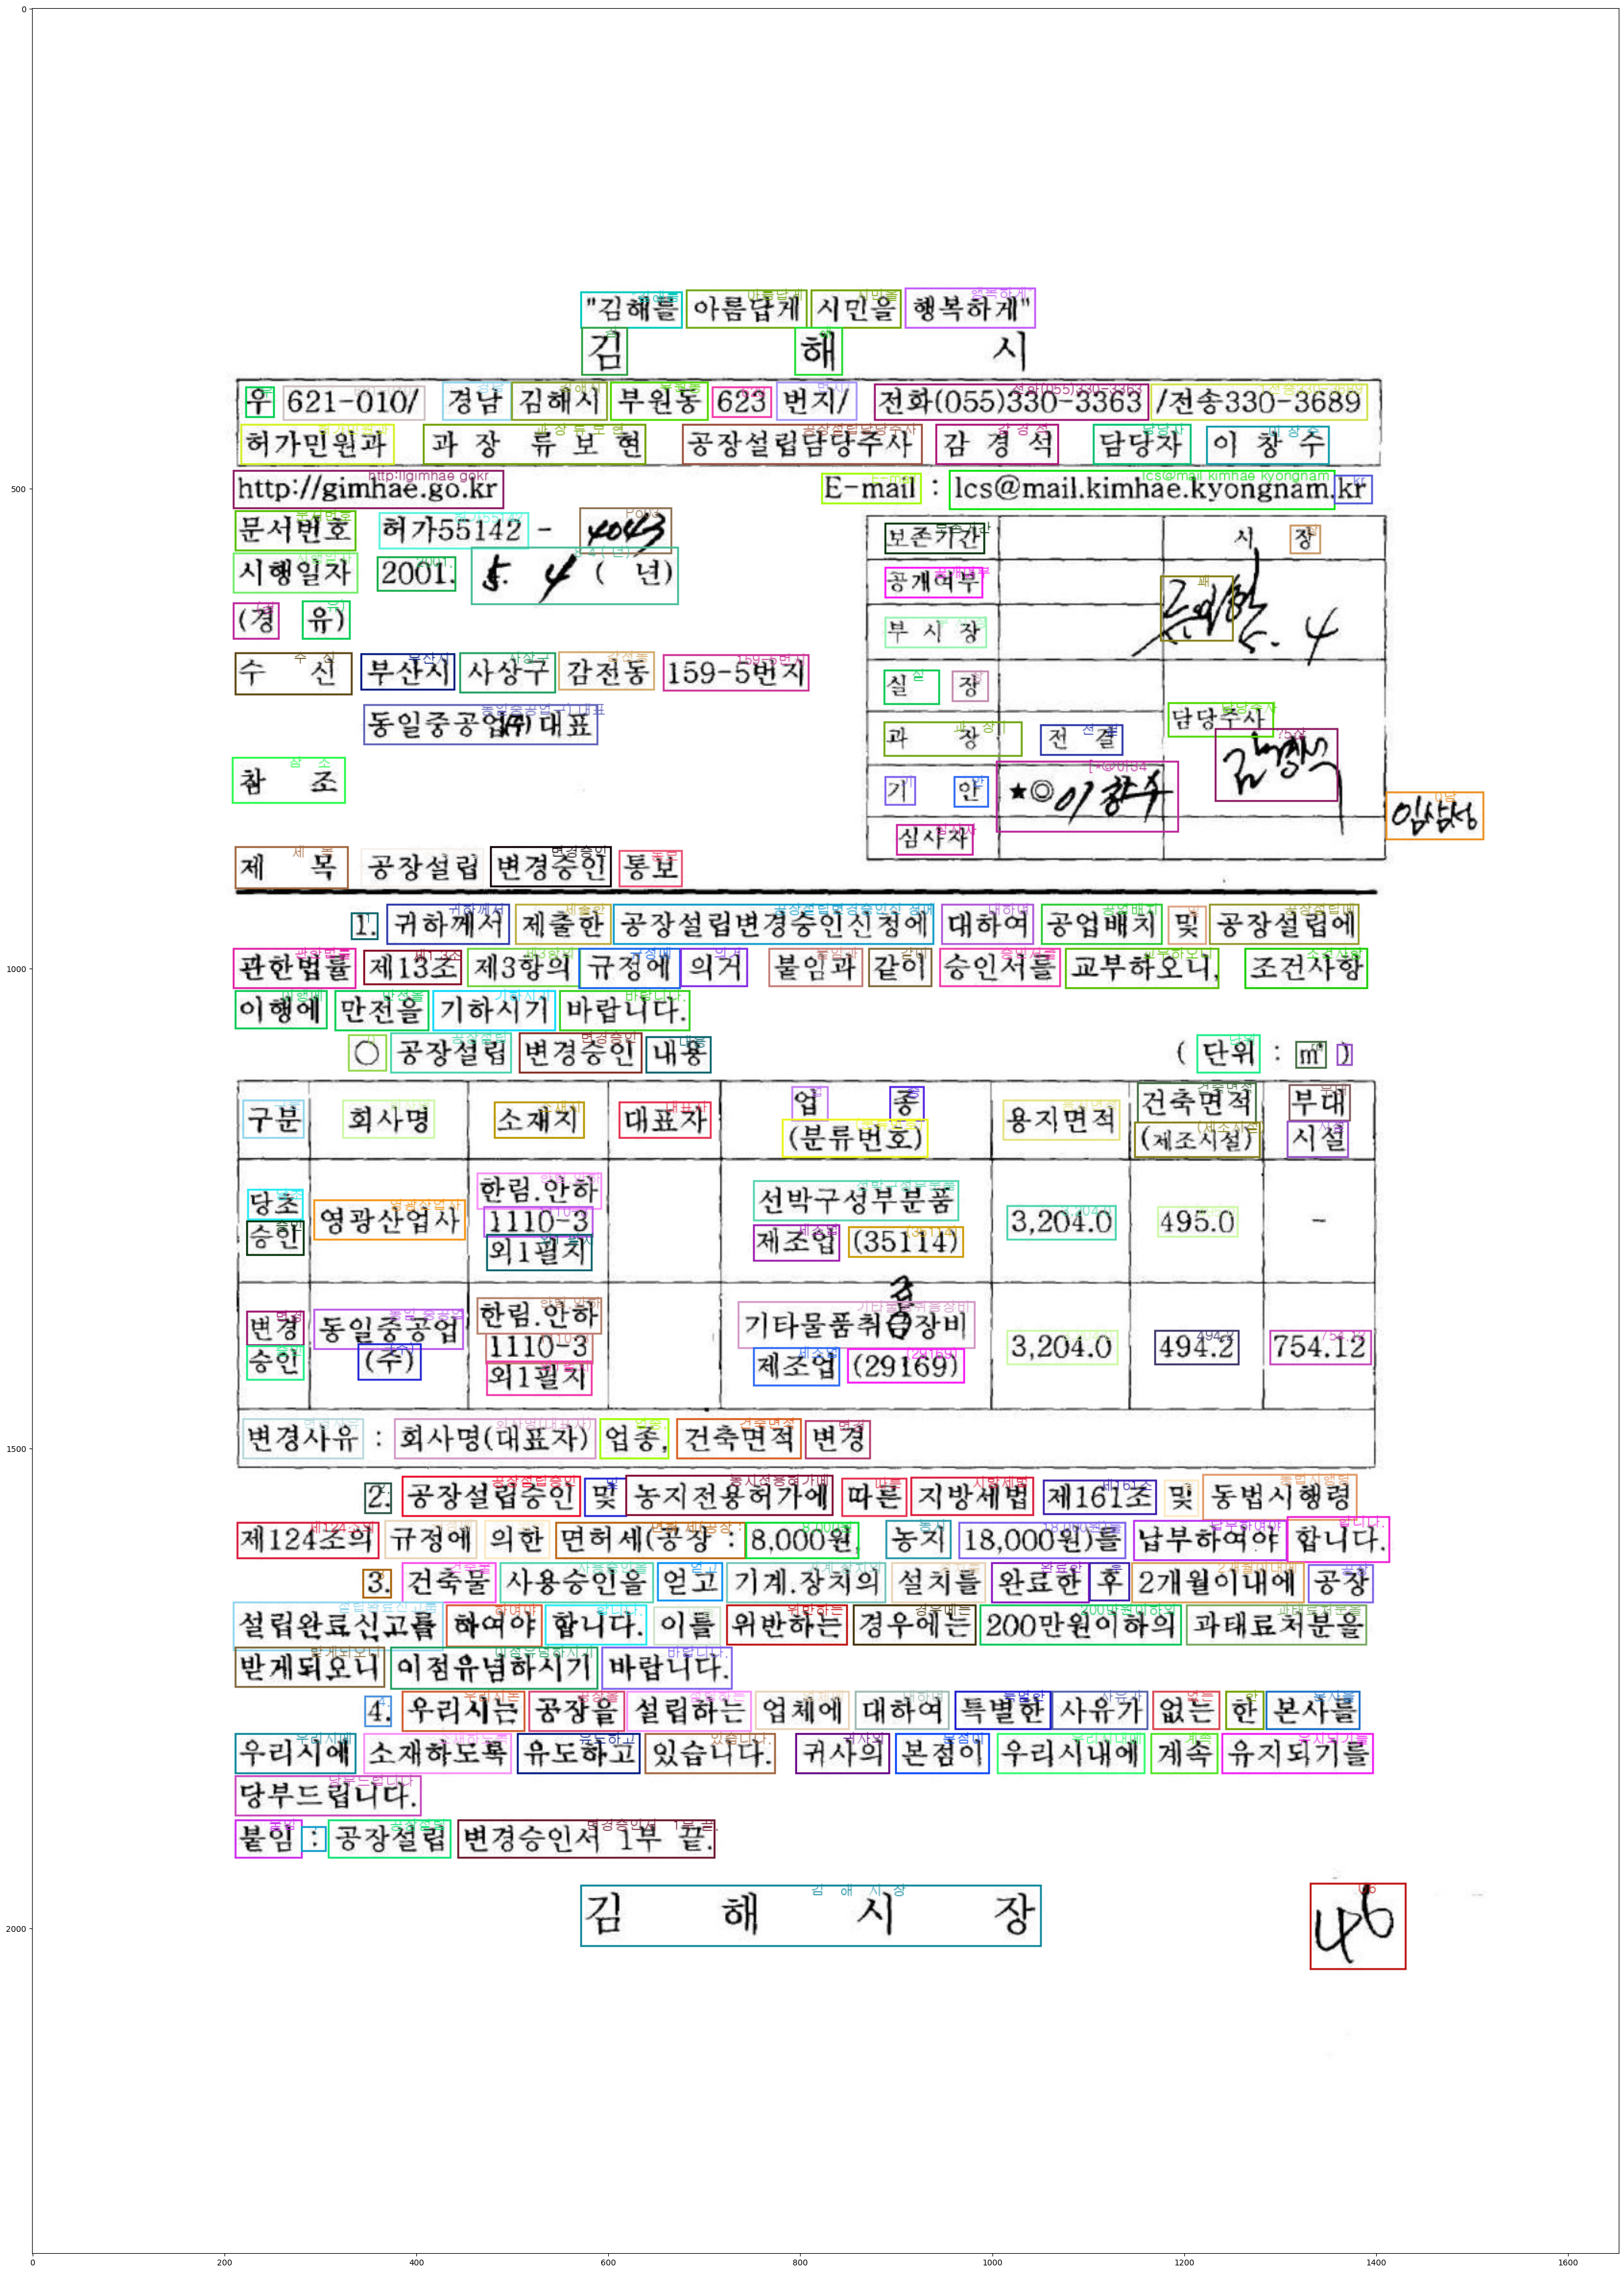

In [24]:
img = cv2.imread('./source/sample_doc.pdf0.jpg')

img = Image.fromarray(img)    # 이미지에 그리기 위해서 CV2 이미지를 PIL 이미지 객체로 변환
font = ImageFont.truetype('./asset/gulim.ttf',15)
draw = ImageDraw.Draw(img)

np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")

for i in result :
    # 이미지 좌표 변수 지정
    x = i[0][0][0] 
    y = i[0][0][1] 
    w = i[0][1][0] - i[0][0][0] 
    h = i[0][2][1] - i[0][1][1]
    
    # 랜덤 색상 지정
    color_idx = random.randint(0,255)
    color = [int(c) for c in COLORS[color_idx]]

    # 이미지에 인식 영역 / 인식 문자 출력
    draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)
    draw.text((int((x + x + w) / 2) , y-2),str(i[1]), font=font, fill=tuple(color),)


plt.figure(figsize=(50,50))
plt.imshow(img)
plt.show()